https://medium.com/@elliottwobler/how-to-get-started-with-grib2-weather-data-and-python-757df9433d19  

https://spire.com/tutorial/spire-weather-tutorial-intro-to-processing-grib2-data-with-python/

https://eccc-msc.github.io/open-data/msc-data/nwp_reps/readme_reps-datamart_en/

### File name nomenclature
NOTE: ALL HOURS ARE IN UTC.

### Polar-stereographic grid at 15km resolution
Files have the following nomenclature:

    CMC-reps-srpe-{datatype}_{VAR}_{LVLTYPE}_{LVL}_{resolution}_{YYYYMMDDHH}_P{hhh}_{content}.grib2
    
where:

* *datatype* : Can be "raw" for individual member direct model output or prob for probabilistic * products created from all members
* *VAR* : Variable name (ex: WIND)
* *LVLTYPE* : Level type (ex: SFC for surface, NTAT for the top of the atmosphere, DBLL_10cm for 10cm under the surface, TGL for above ground level)
* *LVL* : Level value (ex: 10m for 10 meters)
* *resolution* : Grid resolution (ex: ps15km)
* *YYYYMMDDHH* : Year, month, and day of the beginning of the forecast and model run in UTC [00, 06, * 12, 18]
* *P{hhh}* : P is a constant character. "hhh" is the forecast hour [000, 003, 006, ..., 072].
* *FileContent* : can be "all-products" or "allmbrs", indicating that all the members or all the probabilistic products for this variable are contained in the file
grib2 : Constant string indicating that the GRIB2 format is used


### Rotated lat-lon grid at 10km resolution
Files have the following nomenclature:

    {YYYYMMDD}T{HH}Z_MSC_REPS_{VAR}_{LVLTYPE-LVL}_{Grille}{resolution}_PT{hhh}H.grib2

    
The variables for the ensemble products available in the GRIB2 files are listed below. Some examples are mentioned for the rotated lat-lon grid at 10km resolution.

* *FPRATE* : Freezing rain accumulated over a period. Ex: FPRATE-Accum24h-Prob
* *HEATX* : Humidex 2m above ground. Ex: HEATX-Prob_AGL-2m; HEATX-Max24h-Prob_AGL-2m (maximum humidex * 2m above ground over a period of 24h)
* *IPRATE* : Ice pellets (water equivalent) accumulated over a period. Ex: IPRATE-Accum12h-Prob
* *RPRATE* : Rain accumulated over a period Ex: RPRATE-Accum6h-Prob
* *SPRATE* : Snow (water equivalent) accumulated over a period. Ex: SPRATE-Accum24h-Prob
* *TEMP* / *TMP* : Temperature 2m above ground. Ex: TMP-Prob_AGL-2m; TMP-Max24h-Prob_AGL-2m (maximum * temperature 2m above ground over a 24h period)
* *TPRATE* : Total precipitation accumulated over a period. Ex: TPRATE-Max48h-Prob
* *WCF* : Wind chill factor 2m above ground. Ex: WCF-Prob_AGL-2m; WCF-Min24h-Prob_AGL-2m (minimum wind * chill factor 2m above ground over a 24h period)
* *WIND* : Wind speed 10m above ground. Ex: WIND-Prob_AGL-10m; WIND-Max12h-Prob_AGL-10m (maximum wind speed 10m above ground over a 12h period)
The GRIB2 files variables for individual members are the following. The variables are available from 0 to 72h, every 3h. Some examples are indicated for the rotated lat-lon grid at 10km resolution.

### List of variables
* *AFRAIN* : Accumulated precipitation in the form of freezing rain
* *ARAIN* : Accumulated precipitation in the form of rain
* *AICEP* : Accumulated precipitation in the form of ice
* *ASNOW* : Accumulated precipitation in the form of snow
* *APCP* : Accumulated precipitation, total of all forms
* *SNOD* : Snow depth
* *WEASD* : Water equivalent of accumulated Snow Depth
* *HGT* : Geopotential height ay different pressure levels. Ex: HGT_ISBL-0500, geopotential height at 500hPa
* *RH* : Relative humidity at different pressure levels. Ex: RH_ISBL-0010, relative himidity at 10hPa; RH_AGL-2m, relative himidity 2m above ground
* *UGRD* : Wind U-component at different pressure levels. Ex: UGRD_ISBL-0700, wind U-component at 700hPa
* *VGRD* : Wind V-component at different pressure levels. Ex: VGRD_ISBL-0700, wind V-component at 700hPa
* *TMP* : Temperature at different pressure levels. Ex: TMP_AGL-2m, temperature 2m above ground; * TMP_ISBL-0050, temperature at 50hPa
* *TCDC* : Total cloud cover
* *PRES* : Surface pressure
* *PRMSL* : Mean sea level pressure
* *TSOIL* : Soil temperature 10cm below surface. Ex: TSOIL_DBS-10cm
* *VSOILM* : Volumetric soil moisture 10cm below surface. Ex: VSOILM_DBS-10cm
* *LHTFL* : Latent heat net flux at surface
* *SHTFL* : Sensible heat net flux at surface
* *ULWRF* : Upward long-wave radiation flux at the nominal top of the atmosphere. Ex: ULWRF_NTAT
* *DLWRF* : Downward long-wave radiation flux at surface
* *DSWRF* : Downward short-wave radiation flux at surface

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes

In [3]:
ds = xr.open_dataset(
    "../data/CMC-reps-srpe-raw_TMP_ISBL_0500_ps15km_2022121418_P012_allmbrs.grib2",
    engine="cfgrib",
    backend_kwargs={"filter_by_keys": {"dataType": "pf"}},
    indexpath="",
)
print(ds)


<xarray.Dataset>
Dimensions:        (number: 20, y: 510, x: 600)
Coordinates:
  * number         (number) int64 1 2 3 4 5 6 7 8 9 ... 13 14 15 16 17 18 19 20
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t              (number, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    history:                 2022-12-15T14:42 GRIB to CDM+CF via cfgrib-0.9.1...


In [4]:
ds["t"]["longitude"]

<xarray.DataArray 'longitude' (y: 510, x: 600)>
[306000 values with dtype=float64]
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] ...
Dimensions without coordinates: y, x
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [5]:
ds.dims

Frozen({'number': 20, 'y': 510, 'x': 600})

In [6]:
ds.coords

Coordinates:
  * number         (number) int64 1 2 3 4 5 6 7 8 9 ... 13 14 15 16 17 18 19 20
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] ...

In [7]:
ds.values()

ValuesView(<xarray.Dataset>
Dimensions:        (number: 20, y: 510, x: 600)
Coordinates:
  * number         (number) int64 1 2 3 4 5 6 7 8 9 ... 13 14 15 16 17 18 19 20
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t              (number, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    history:                 2022-12-15T14:42 GRIB to CDM+CF via cfgrib-0.9.1...)

Following https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html to visualize the data

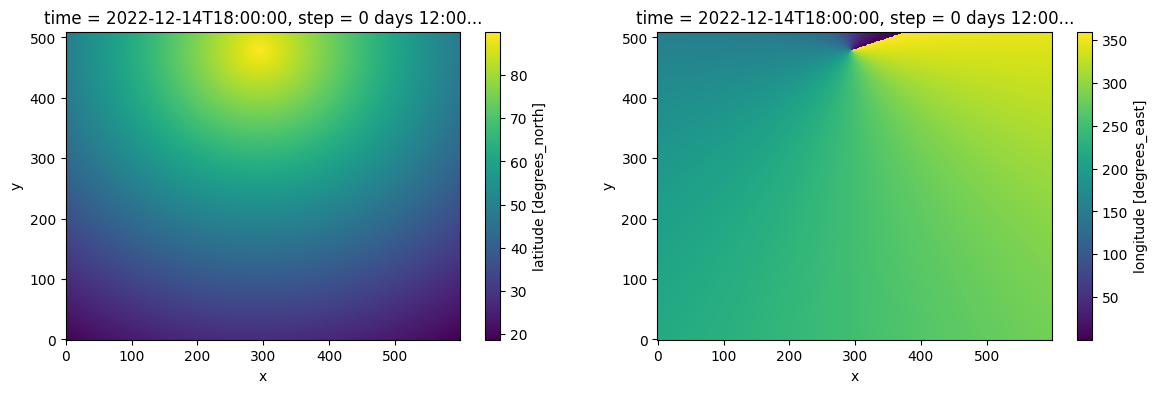

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))
ds.latitude.plot(ax=ax1)
ds.longitude.plot(ax=ax2)

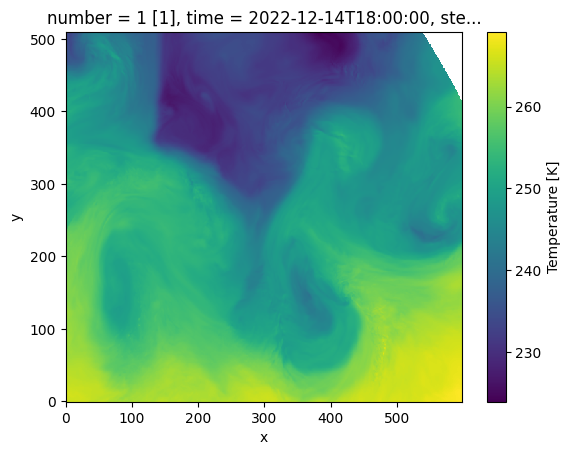

In [9]:
ds.t[0].plot()

/tmp/ipykernel_2168/3331600180.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


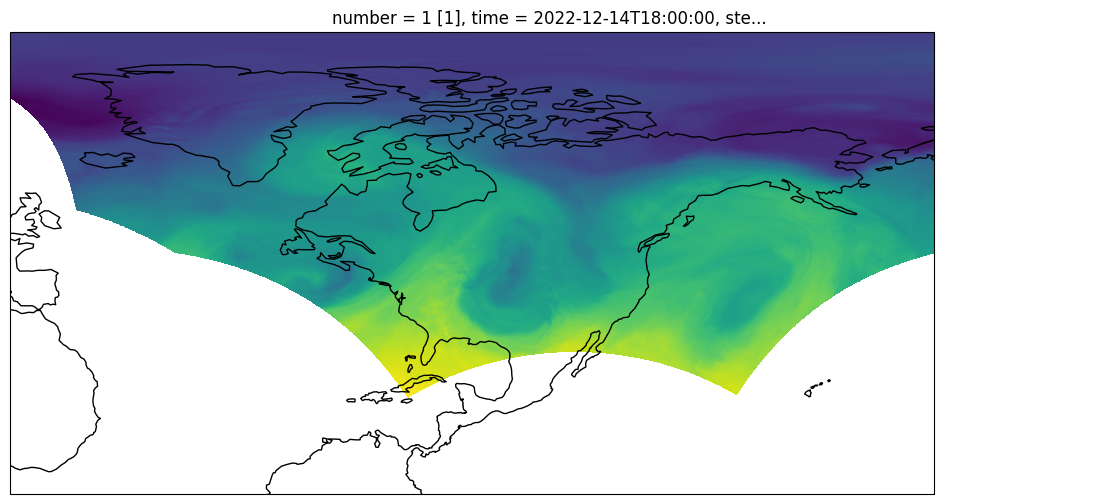

In [16]:
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()


ds.t[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", add_colorbar=False
)
ax.set_xlim([0, -210])
ax.set_ylim([0, 90])
fig.show()

/tmp/ipykernel_2168/910760590.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


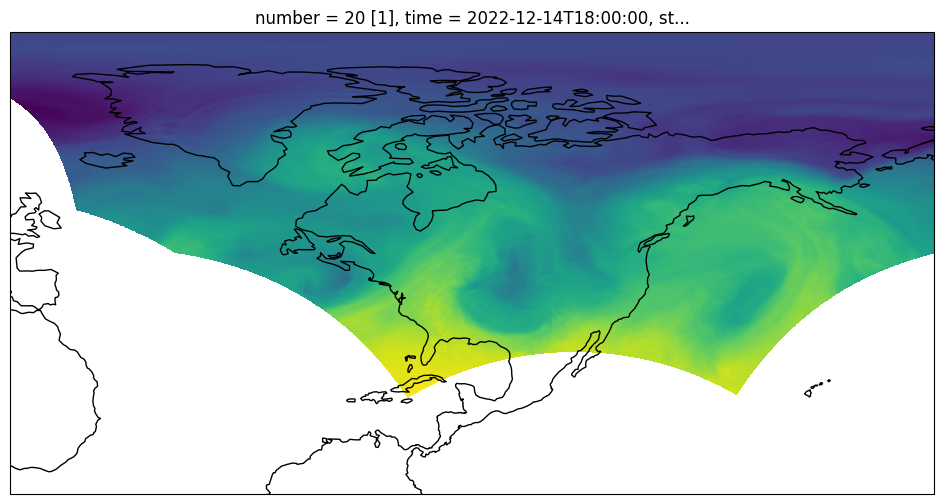

In [11]:
fig = plt.figure(figsize=(14, 6))
ax:GeoAxes = plt.axes(projection=ccrs.PlateCarree(), ylim=(0, 90), xlim=(0, -180))
ax.set_global()
ax.coastlines()


ds.t[19].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", add_colorbar=False
)
ax.set_xlim([0, -180])
ax.set_ylim([0, 90])
fig.show()